In [1]:
import pandas as pd
import numpy as np

In [21]:
city = pd.read_excel('/Ch02/Practice Files/Citydata.xlsx',
                     skiprows=4, usecols=range(2, 5), index_col=0)

Расстояние между любыми двумя городами США (за исключением городов на Аляске и Гавайях) можно приблизительно вычислить по следующей формуле: $$69 \sqrt{(lat_{1} - lat_{2})^2 + (long_{1} - long_{2})^2}$$

Создайте таблицу, определяющую расстояние между любыми двумя городами из этого списка.

In [72]:
def distance(cit_1: str, cit_2: str) -> int:
    lat_1, long_1 = city.loc[cit_1].values
    lat_2, long_2 = city.loc[cit_2].values
    return int(69 * np.sqrt((lat_1 - lat_2) ** 2 + (long_1 - long_2) ** 2))

In [154]:
d = np.zeros((len(city), len(city)))
for i, city_1 in enumerate(city.index):
    for j, city_2 in enumerate(city.index):
        d[i,j] = distance(city_1, city_2)

In [160]:
distances = pd.DataFrame(d.astype(int), index=city.index, columns=city.index)

Таблица расстояний между городами

In [161]:
distances

,New York,Boston,Philadelphia,Charlotte,Atlanta,New Orleans,Miami,Dallas,Houston,Chicago,...,Cleveland,Indy,Denver,Minneapolis,Phoenix,Salt Lake City,LA,SF,SD,Seattle
New York,0,228,95,608,866,1328,1116,1671,1663,955,...,541,844,2139,1371,2682,2622,3104,3366,3030,3347
Boston,228,0,324,835,1094,1555,1303,1897,1891,1152,...,740,1056,2345,1549,2900,2823,3319,3573,3247,3546
Philadelphia,95,324,0,514,771,1232,1041,1577,1567,878,...,467,759,2056,1302,2592,2539,3015,3281,2940,3265
Charlotte,608,835,514,0,266,723,649,1116,1074,658,...,439,484,1692,1095,2162,2180,2595,2889,2510,2904
Atlanta,866,1094,771,266,0,461,623,858,807,597,...,563,430,1473,987,1911,1958,2346,2650,2257,2676
New Orleans,1328,1555,1232,723,461,0,729,513,379,828,...,974,725,1236,1061,1550,1691,1986,2319,1886,2381
Miami,1116,1303,1041,649,623,729,0,1243,1084,1219,...,1088,1048,1959,1603,2264,2419,2697,3040,2591,3109
Dallas,1671,1897,1577,1116,858,513,1243,0,228,883,...,1202,882,738,875,1056,1179,1493,1813,1400,1867
Houston,1663,1891,1567,1074,807,379,1084,228,0,983,...,1243,942,951,1058,1180,1368,1614,1956,1511,2033
Chicago,955,1152,878,658,597,828,1219,883,983,0,...,414,176,1194,445,1778,1671,2183,2423,2121,2394


1. С помощью функции ИНДЕКС определите расстояние между Лос-Анджелесом и Финиксом, а также расстояние между Денвером и Майами.

In [162]:
distance('LA', 'Phoenix'), distance('Denver', 'Miami')

(436, 1959)

2. С помощью функции ИНДЕКС вычислите суммарное расстояние от Далласа до других городов.

In [206]:
distances['Dallas'].sum(axis=0)

23645

3. Жительница Далласа, штат Техас, отправляется в путешествие на машине в Чикаго, Денвер, Лос-Анджелес, Финикс и Сиэтл. Сколько миль ей предстоит проехать?

In [169]:
rout = ['Dallas', 'Chicago', 'Denver', 'LA', 'Phoenix', 'Seattle']

In [175]:
full_distance = 0
for pair in list(zip(rout, rout[1:])):
    full_distance += distances.loc[pair[0], pair[1]] #distance(*pair)
full_distance

4428

В файле Grades.xlsx содержатся экзаменационные баллы студентов. Шкала соотношения баллов и оценок приведена в таблице.

| Баллы | Оценка |
| :- | :-: |
| Ниже 60 | F |
| 60—69 | D |
| 70—69 | C |
| 80—89 | B |
| 90 и выше | A |

Используйте формулу для определения буквенной оценки каждого студента на этом экзамене.

In [36]:
grades = pd.read_excel('/Ch02/Practice Files/grades.xlsx',
                     skiprows=5, usecols=range(3, 5))

In [47]:
grades['Grade'] = pd.cut(grades.Score, bins=[-np.inf, 60, 69, 79, 89, np.inf], labels=list('FDCBA'))

In [48]:
grades

,Score,Grade
0,63,D
1,40,F
2,44,F
3,74,C
4,99,A
...,...,...
108,55,F
109,41,F
110,59,F
111,66,D


В файле Employees.xlsx содержится рейтинг (по шкале от 0 до 10), присвоенный каждым из 35 сотрудников трем заданиям. В файле также указаны задания, назначенные каждому сотруднику. С помощью формулы определите рейтинг, который каждый сотрудник присвоил назначенному ему заданию

In [53]:
employees = pd.read_excel('/Ch02/Practice Files/employees.xlsx',
                          skiprows=4,
                          usecols=range(1, 7),
                          index_col=2)

In [68]:
employees['Rank'] = employees.apply(lambda df: df[df['Assigned to'].astype(int)].astype(int), axis=1)

In [69]:
employees

,Rank,Assigned to,1,2,3
Worker,,,,,
1,5,2,4,5,4
2,1,2,1,1,6
3,9,2,8,9,2
4,3,1,3,1,5
5,7,2,9,7,8
6,8,2,3,8,6
7,5,3,5,4,5
8,9,2,5,9,5
9,1,2,3,1,10


В файле Nbadistances.xlsx показаны расстояния между любой парой спортивных арен НБА. Предположим, что находясь в Атланте, необходимо посетить арены в указанном порядке и затем вернуться в Атланту. Насколько длинным окажется путешествие?

In [197]:
Nbadistances = pd.read_excel('/Ch03/Practice Files/Nbadistances.xlsx',
                              usecols=range(2,33), index_col=0)

In [202]:
Nbadistances

,Atlanta,Boston,Charlotte,Chicago,Cleveland,Dallas,Denver,Detroit,Golden State,Houston,...,Orlando,Philadelphia,Phoenix,Portland,Sacramento,San Antonio,Seattle,Toronto,Utah,Washington
Atlanta,0.0000,936.6688,226.7853,588.1757,553.8188,721.5437,1218.0933,608.3514,2128.7805,701.4528,...,401.4298,663.3482,1591.6684,2172.3091,2086.1141,882.4412,2181.5838,735.9878,1583.1442,541.7573
Boston,936.6688,0.0000,720.6751,852.9186,550.5893,1552.1614,1774.1155,629.2696,2689.0357,1605.2071,...,1114.9356,273.5642,2299.8683,2539.3973,2631.0563,1766.9534,2492.2631,431.3524,2098.7672,394.9290
Charlotte,226.7853,720.6751,0.0000,588.6458,434.1983,930.9528,1364.3885,522.1530,2291.0725,926.7392,...,462.5219,447.6411,1782.5392,2289.5077,2244.4277,1105.4190,2285.2923,588.1744,1727.2478,328.3485
Chicago,588.1757,852.9186,588.6458,0.0000,310.7750,803.3595,922.6840,224.9533,1846.4435,939.4358,...,985.6322,667.9844,1452.0514,1756.8598,1790.9991,1050.5431,1735.3692,439.0717,1258.0651,597.4263
Cleveland,553.8188,550.5893,434.1983,310.7750,0.0000,1026.2374,1232.1416,113.1587,2157.2178,1113.7954,...,893.3922,359.1523,1749.3791,2055.5284,2101.7189,1257.0025,2026.4251,191.3496,1568.7309,304.5719
Dallas,721.5437,1552.1614,930.9528,803.3595,1026.2374,0.0000,668.6480,995.3916,1472.1182,224.7778,...,963.2098,1298.8491,885.6090,1632.7538,1439.8514,251.5540,1680.6166,1205.7027,999.1334,1184.3888
Denver,1218.0933,1774.1155,1364.3885,922.6840,1232.1416,668.6480,0.0000,1144.8941,933.2864,884.6065,...,1557.5185,1583.7181,584.3414,976.3049,882.8597,807.0737,1014.2248,1349.9264,365.0766,1498.2042
Detroit,608.3514,629.2696,522.1530,224.9533,113.1587,995.3916,1144.8941,0.0000,2063.6308,1104.4521,...,971.9149,464.4448,1676.8205,1948.4622,2006.9096,1234.9548,1916.9430,216.7456,1473.8677,417.3337
Golden State,2128.7805,2689.0357,2291.0725,1846.4435,2157.2178,1472.1182,933.2864,2063.6308,0.0000,1634.5366,...,2430.6930,2512.6328,643.9213,534.9639,68.1920,1479.0023,677.6888,2258.9598,590.2752,2430.3360
Houston,701.4528,1605.2071,926.7392,939.4358,1113.7954,224.7778,884.6065,1104.4521,1634.5366,0.0000,...,849.1169,1338.9231,1016.2445,1835.5434,1608.5232,189.7920,1890.4460,1302.2439,1199.7346,1218.9111


In [203]:
Nbadistances.values.diagonal(1).sum() # первая побочная диагональ — расстояние по всему маршруту

33365.658200000005

In [208]:
Nbadistances.iloc[-1, 0] # .loc['Washington', 'Atlanta'] обратный путь в Атланту

541.7573

В файле Matchtype1.xlsx перечислены суммы 30 сделок в хронологическом порядке. Напишите формулу для определения первой сделки, после которой общий объем сделок превысил 10 000 долларов.

In [209]:
matchtype = pd.read_excel('/Ch04/Practice Files/Matchtype1.xlsx',
                              skiprows=4, index_col=0)

In [215]:
matchtype[matchtype['Cumulative'] > 10000].head(1)

,Amount,Cumulative
Transaction,,
10,1344,10177


В файле Matchthemax.xlsx содержатся идентификационные коды продуктов и показатели продаж в штуках для 265 продуктов. С помощью формулы с функцией ПОИСКПОЗ определите идентификационный код продукта с наибольшим показателем продаж.

In [221]:
matchthemax = pd.read_excel('/Ch04/Practice Files/Matchthemax.xlsx',
                              skiprows=3, usecols=range(3), index_col=0)

In [225]:
matchthemax[matchthemax.Amount == matchthemax.Amount.max()]

,Product ID,Amount
Transaction,,
177,eqg,4979


В файле Buslist.xlsx содержатся интервалы времени (в минутах) между автобусами на пересечении 45-й улицы и Парк-авеню в Нью-Йорке. Напишите формулу расчета времени ожидания пассажиром автобуса для любого времени прихода пассажира на остановку (отсчет от первого автобуса). Например, если бы вы пришли на остановку, начиная с настоящего момента, через 12,4 минуты, а автобусы прибыли бы, начиная с настоящего момента, через 5 минут и через 21 минуту, вам пришлось бы ждать автобус 21 – 12,4 = 8,6 минуты.

In [246]:
buses = pd.read_excel('/Ch04/Practice Files/Buslist.xlsx',
                              skiprows=3, usecols=range(5,6))

In [249]:
buses.index = range(1, 20)
buses.index.name = 'Bus #'
buses['Arrival'] = buses['Times between buses'].cumsum()

In [250]:
buses

,Times between buses,Arrival
Bus #,,
1,45.4,45.4
2,18.6,64.0
3,76.5,140.5
4,88.6,229.1
5,97.4,326.5
6,23.1,349.6
7,98.0,447.6
8,33.7,481.3
9,2.8,484.1


In [235]:
arrival_time = 400

In [251]:
(buses.query('Arrival > @arrival_time')['Arrival'] - arrival_time).head(1)

Bus #
7    47.6
Name: Arrival, dtype: float64

В ячейках B3:B6 файла Showbiz.xlsx содержатся фиктивные адреса некоторых известных людей. С помощью текстовых функций запишите имена в один столбец, а адрес в другой.

In [257]:
showbiz = pd.read_excel('/Ch05/Practice Files/Showbiz.xlsx',
                              skiprows=1, usecols=range(1,2), names=['text'])

In [284]:
showbiz.text.str.extract(r'(?P<name>.*)\s(?P<address>\d+.*)')

,name,address
0,Allie Mcbeal,1200 Lawyer Drive
1,Drew Carey,1000 Hollywood Lane
2,Britney Spears,300 Singer Road
3,Peyton Manning,500 QB Street


В файле Quarterlygnpdata.xlsx хранятся квартальные данные по валовому нацио- нальному продукту (GNP) США (в млрд долларов). Распределите эти данные по трем столбцам следующим образом: в первый столбец запишите год, во второй — номер квартала и в третий — GNP.

In [289]:
quarterlygnpdata = pd.read_excel('/Ch05/Practice Files/Quarterlygnpdata.xlsx',
                                 skiprows=7, names=['data'])

In [294]:
quarterlygnpdata.data.str.extract(r'(?P<year>\d{4}).(?P<quarter>\d)\s+(?P<GNP>[0-9.]+)')

,year,quarter,GNP
0,1950,1,1618.4
1,1950,2,1667.2
2,1950,3,1733.1
3,1950,4,1763.9
4,1951,1,1782.9
...,...,...,...
205,2001,2,9224.3
206,2001,3,9199.8
207,2001,4,9283.5
208,2002,1,9367.5


В файле Textstylesdata.xlsx содержится информация о фасоне, цвете и размере различных рубашек. Например, первая рубашка имеет фасон 100 (указанный цифрами между двоеточием и дефисом), цвет 65 и размер L. С помощью текстовых функций распределите по столбцам фасон, цвет и размер для каждой рубашки.

In [299]:
styles = pd.read_excel('/Ch05/Practice Files/Textstylesdata.xlsx',
                        names=['item'])

In [301]:
styles.item.str.extract(r':(?P<style>\d{3})-(?P<color>\d{2})(?P<size>\w+)')

,style,color,size
0,100,65,L
1,100,65,XL
2,100,65,XXL
3,100,06,M
4,100,06,L
...,...,...,...
59,125,01,S
60,125,01,M
61,125,01,L
62,125,01,XL


В файле Emailproblem.xlsx даны имена и фамилии нескольких новых сотрудников Microsoft. Для создания адреса электронной почты каждого сотрудника возьмите первую букву имени сотрудника, затем фамилию сотрудника и в конце добавьте @microsoft.com. Рекомендуется создать адреса путем рационального использования текстовых функций.

In [312]:
emails = pd.read_excel('/Ch05/Practice Files/Emailproblem.xlsx',
                        skiprows=1, usecols=range(4,5), names=['name'])

In [315]:
emails['email'] = emails.name.apply(lambda x: f"{x[0]}{x.split()[-1]}{'@microsoft.com'}")

In [316]:
emails

,name,email
0,Calista Flockhart,CFlockhart@microsoft.com
1,Peyton Manning,PManning@microsoft.com
2,Jessica Simpson,JSimpson@microsoft.com
3,Britney Spears,BSpears@microsoft.com
4,Vince Vaughn,VVaughn@microsoft.com
5,Owen Wilson,OWilson@microsoft.com
6,Dirk Nowitzki,DNowitzki@microsoft.com
7,Duane Wade,DWade@microsoft.com
8,Albert Puhols,APuhols@microsoft.com


В файле Reversenames.xlsx содержатся имена, вторые имена или инициалы и фамилии нескольких людей. Преобразуйте эти имена следующим образом: сначала фамилия, за ней запятая, а затем имя и второе имя. Например, преобразуйте Gregory William Winston в Winston, Gregory William.

In [321]:
reversenames = pd.read_excel('/Ch05/Practice Files/Reversenames.xlsx',
                             skiprows=3, usecols=range(1,2), names=['name'])

In [335]:
reversenames['combined'] = reversenames.name.str.replace('(?P<first>\w+) (?P<middle>[a-zA-Z.]+) (?P<last>\w+)',
                               lambda m: f"{m.group('last')}, {m.group('first')} {m.group('middle')}", regex=True)

In [336]:
reversenames

,name,combined
0,Gregory William Winston,"Winston, Gregory William"
1,Vivian June Winston,"Winston, Vivian June"
2,Wayne Leslie Winston,"Winston, Wayne Leslie"
3,Jennifer Mae Winston,"Winston, Jennifer Mae"
4,Jeff Jack Sagarin,"Sagarin, Jeff Jack"
5,Walter J. Gantz,"Gantz, Walter J."
6,John F. Kennedy,"Kennedy, John F."
7,George Herbert Bush,"Bush, George Herbert"
8,Richard Milhous Nixon,"Nixon, Richard Milhous"


В файле Incomefrequency.xlsx находится распределение стартовых зарплат выпускников MBA колледжа Faber College. Обобщите эти данные с помощью частотного графа.

In [344]:
incomefrequency = pd.read_excel('/Ch05/Practice Files/Incomefrequency.xlsx',
                             skiprows=1, usecols=range(3,5), names=['bin', 'income'])

In [352]:
incomefrequency.style.bar(subset=['income'], align='mid', color='#5fba7d')

,bin,income
0,<$75k,30
1,$75-$85 k,50
2,$86-$95k,50
3,$96-$105k,45
4,Over $105k,30


В файле Ageofmachine.xlsx содержатся данные в следующей форме:
- S/N: 160768, vib roller, 84′′ smooth drum, canopy Auction: 6/2–4/2005 in Montgomery, Alabama;
- каждая строка связана с покупкой машины.
Определите год каждой покупки.

In [360]:
ageofmachine = pd.read_excel('/Ch05/Practice Files/Ageofmachine.xlsx',
                             skiprows=3, usecols=range(2,3), names=['desc']).dropna()

In [397]:
ageofmachine['year'] = ageofmachine['desc'].str.extract(r'Auction: \d{1,2}/[1-9-]+/(?P<year>\d{4})')

In [398]:
ageofmachine

,desc,year
0,"S/N: 160768, vib roller,84"" smooth drum,canopy...",2005
1,"S/N: 160321, OROPS,dsl,84"" drum Auction: 4/6-8...",2006
2,"S/N: 156121, vib roller,Cummins dsl eng,OROPS ...",2004


В файле Problem17data.xlsx содержатся имена людей (например, Mr. John Doe). С помощью текстовых функций извлеките обращение (Mr. или Mrs.) и первое имя каждого человека и поместите их в отдельные столбцы.

In [41]:
mrs = pd.read_excel('~/Study/excel/Ch05/Practice Files/Problem17data.xlsx',
                    skiprows=1, usecols=[2], names=['names'])

In [42]:
mrs

,names
0,Mr. John Doe
1,Mrs. Wendy Liu
2,Ms. Juli Sipe
3,Mr. Jeff Sagarin
4,Mr. Alex Baldwin
5,Mr. James Dean
6,Ms. Cora Hsu


In [49]:
mrs.names.str.extract(r'(?P<title>M[rs].*\.)\s(?P<first_name>\w+)\s')

,title,first_name
0,Mr.,John
1,Mrs.,Wendy
2,Ms.,Juli
3,Mr.,Jeff
4,Mr.,Alex
5,Mr.,James
6,Ms.,Cora


В файле Machinedates.xlsx содержатся даты покупки и продажи нескольких машин. Определите, сколько месяцев и лет хранились эти машины.

In [52]:
machinedates = pd.read_excel('~/Study/excel/Ch06/Practice Files/Machinedates.xlsx',
                    skiprows=2, usecols=range(3,7))

In [73]:
machinedates['Months kept'] = machinedates \
                        .apply(lambda df: (df['Sold'] - df['Bought']) / np.timedelta64(1, 'M'), axis=1).astype(int)

In [74]:
machinedates['Years kept'] = machinedates \
                        .apply(lambda df: (df['Sold'] - df['Bought']) / np.timedelta64(1, 'Y'), axis=1).astype(int)

In [75]:
machinedates

,Bought,Sold,Months kept,Years kept
0,2012-04-27,2013-08-22,15,1
1,2012-12-01,2014-09-04,21,1
2,2013-07-30,2015-05-13,21,1
3,2013-07-10,2015-03-15,20,1
4,2019-11-17,2022-07-22,32,2
5,2020-01-02,2023-07-03,41,3
6,2017-01-18,2021-02-03,48,4
7,2018-10-06,2022-01-07,39,3
8,2017-09-10,2019-09-23,24,2
9,2016-04-11,2020-02-10,45,3


В файле Addresses.xlsx имена людей указаны на одной строке, часть адреса с названием улицы на другой строке, а город, штат и почтовый индекс на следующей строке. Каким образом можно указать информацию о каждом человеке в одной строке?

In [99]:
addresses = pd.read_excel('~/Study/excel/Ch11/Practice Files/Addresses.xlsx',
                      skiprows=1, usecols=range(2,5)).rename(columns={'Unnamed: 2': 'address'})

In [128]:
addresses

,address
0,Wayne Winston
1,3600 Winston St
2,Bloomington IN 47401
3,Jeff Sagarin
4,18 Tree Street
5,New York NY 10039
6,Juli Lipe
7,51 Springbrook Road
8,Livingston NJ 07039
9,Marilu Heppner


In [127]:
addresses.groupby(addresses.index // 3).transform(lambda x: ' '.join(x)).drop_duplicates()

,address
0,Wayne Winston 3600 Winston St Bloomington IN 4...
3,Jeff Sagarin 18 Tree Street New York NY 10039
6,Juli Lipe 51 Springbrook Road Livingston NJ 07039
9,Marilu Heppner 1212 1st Street Chicago III 90210


В файле FormattingDDAnum.xlsx содержится несколько текстовых строк, таких как DDA, D, DDA1250045 и т. д. Ячейка является правильно отформатированной, если первыми тремя символами являются DDA, а последними семью символами — число не меньше миллиона. Определите, какие ячейки отформатированы должным образом.

In [141]:
dda = pd.read_excel('~/Study/excel/Ch11/Practice Files/FormattingDDAnum.xlsx',
                      skiprows=2, usecols=range(2,3), nrows=14, names=['id'])

In [151]:
dda

,id
0,DDA : D
1,DDA : DD
2,DDA :DDA
3,DDA :DDA5
4,DDA 54389
5,DDA 54472
6,DDA 54508
7,DDA 543822
8,DDA 543898
9,DDA 546941


In [159]:
import re
fmt = r'^DDA\d{6,}$'

In [161]:
dda.id.apply(lambda x: re.match(fmt, x) and re.match(fmt, x)[0] or 'INCORRECT')

0      INCORRECT
1      INCORRECT
2      INCORRECT
3      INCORRECT
4      INCORRECT
5      INCORRECT
6      INCORRECT
7      INCORRECT
8      INCORRECT
9      INCORRECT
10     INCORRECT
11     INCORRECT
12    DDA1225183
13    DDA1250045
Name: id, dtype: object

В файле Matchlist.xlsx содержится список покупателей, приобретших ваш продукт в феврале, и список покупателей, приобретших его в марте. Определите, сколько клиентов, купивших продукт в феврале, купили его и в марте.

In [162]:
matchlist = pd.read_excel('~/Study/excel/Ch11/Practice Files/Matchlist.xlsx',
                          skiprows=3, usecols=range(4,6))

In [172]:
np.intersect1d(matchlist['Feb'], matchlist['March'])

array(['Alex', 'Izzie', 'Mike'], dtype=object)

В файле Jobshop.xlsx содержатся даты и время начала различных видов работ, а также время, необходимое для выполнения каждого вида работы. Определите время завершения для каждого вида работ􏰄.

In [174]:
jobshop = pd.read_excel('~/Study/excel/Ch12/Practice Files/Jobshop.xlsx',
                          skiprows=2, usecols=range(2,6))

In [201]:
jobshop

,Start time,days to complete,finish time
0,2006-08-12 07:30:00,12.5,NaN
1,2006-10-10 20:30:00,14.9,NaN
2,2007-01-02 03:00:00,24.3,NaN
3,2007-04-12 09:20:00,28.7,NaN


In [208]:
jobshop['finish time'] = jobshop['Start time'] + \
                         jobshop['days to complete'].apply(lambda x: pd.to_timedelta(x, unit='D'))

In [209]:
jobshop

,Start time,days to complete,finish time
0,2006-08-12 07:30:00,12.5,2006-08-24 19:30:00
1,2006-10-10 20:30:00,14.9,2006-10-25 18:06:00
2,2007-01-02 03:00:00,24.3,2007-01-26 10:12:00
3,2007-04-12 09:20:00,28.7,2007-05-11 02:08:00


В файле Antitrustdata.xlsx содержатся данные о годах начала и завершения множества судебных дел. Определите количество активных судебных дел в течение каждого года.

In [4]:
antitrustdata = pd.read_excel('~/Study/excel/Ch16/Practice Files/Antitrustdata.xlsx',
                              skiprows=3, usecols=range(2))

In [9]:
year, cases = np.unique(np.concatenate(antitrustdata \
                        .apply(lambda df: range(df['Year case starts'],
                                                df['Year case ends'] + 1), axis=1)), return_counts=True)

In [12]:
pd.DataFrame({'year': year, 'cases': cases})

,year,cases
0,1950,22
1,1951,35
2,1952,52
3,1953,70
4,1954,86
5,1955,95
6,1956,107
7,1957,116
8,1958,136
9,1959,153


Данные к заданиям находятся в файле Rock.xlsx.

In [13]:
rock = pd.read_excel('~/Study/excel/Ch19/Practice Files/Rock.xlsx', skiprows=5, usecols=range(3, 7))

In [16]:
rock

,Song Number,Singer,Date,Minutes
0,1,Eminem,2004-05-21,4
1,2,Eminem,2004-04-15,2
2,3,Cher,2005-01-28,2
3,4,Eminem,2005-01-28,4
4,5,Moore,2004-11-05,2
...,...,...,...,...
946,947,Cher,2004-07-20,3
947,948,Springsteen,2004-04-15,4
948,949,Cher,2004-05-21,5
949,950,Moore,2004-11-05,4


Сколько прозвучало песен в исполнении не Бритни Спирс?

In [19]:
rock.groupby('Singer')['Song Number'].count()['Spears']

129

Сколько песен прозвучало до 15 июня 2004 г.?

In [24]:
rock.query('Date < "2004-06-15"').__len__()

263

Сколько песен прозвучало между 1 июня 2004 г. и 4 июля 2006 г.? Подсказка: возьмите разность значений, возвращенных двумя функциями СЧЁТЕСЛИ.

In [27]:
rock.query('"2004-06-01" < Date < "2006-07-04"').shape[0]

721

Сколько песен было исполнено певцами, чьи фамилии начинаются с буквы M?

In [33]:
rock[rock['Singer'].str.contains(r'^M.+$')].shape[0]

493

Сколько песен было исполнено певцами, в именах которых содержится буква e?

In [34]:
rock[rock['Singer'].str.contains('e')].shape[0]

704

Сколько песен Барри Манилоу (Barry Manilow) прозвучало в 2004 г.?

In [43]:
rock[(rock['Date'].dt.year == 2004) & (rock['Singer'] == 'Manilow')].shape[0]

66

Сколько песен с продолжительностью звучания не менее 4 минут в исполнении Мэнди Мур (Mandy Moore) прозвучало в 2007 г. и ранее?

In [46]:
crit1 = rock['Date'].dt.year <= 2007
crit2 = rock['Singer'] == 'Moore'
crit3 = rock['Minutes'] >= 4

rock[crit1  & crit2 & crit3].shape[0]

64

Файл NBA.xlsx содержит следующие данные:

- в столбцах A и B находятся названия команд НБА и их кодовые номера. Например, команда с номером 1 представляет Атланту;
- в столбце C указана команда хозяев поля для каждой игры;
- в столбце D указана команда гостей для каждой игры;
- в столбце E указаны очки, набранные командой хозяев поля;
- в столбце F указаны очки, набранные командой гостей.

На основе этих данных подсчитайте количество игр, в которых участвовала каждая команда.

In [49]:
nba = pd.read_excel('~/Study/excel/Ch19/Practice Files/NBA.xlsx', usecols=range(2, 6))

In [73]:
teams = pd.read_excel('~/Study/excel/Ch19/Practice Files/NBA.xlsx',
                      skiprows=2, nrows=29, usecols=range(2), index_col=0).rename(columns={'Unnamed: 1': 'team'})

In [74]:
teams

,team
1,Atl
2,Bos
3,Charlotte
4,Chicago
5,Cleveland
6,Dallas
7,Denver
8,Detroit
9,Golden
10,Houston


In [52]:
nba

,H,A,HS,AS
0,5,2,89,108
1,18,11,103,97
2,20,27,114,85
3,19,29,93,91
4,17,21,83,74
...,...,...,...,...
1255,24,13,106,112
1256,13,18,99,94
1257,13,18,106,83
1258,18,13,103,106


In [98]:
games = nba.H.value_counts() + nba.A.value_counts()

In [100]:
games.index = teams.team
games

team
Atl              82
Bos              98
Charlotte        91
Chicago          82
Cleveland        82
Dallas           90
Denver           82
Detroit          92
Golden           82
Houston          82
Indiana          87
LAC              82
LAL             101
Memphis          82
Miami            82
Milwaukee        82
Minnesota        85
NJN             102
NYK              82
Orlando          86
Philadelphia     87
Phoenix          82
Portland         85
Sacramento       98
SAN              92
Seattle          87
Toronto          87
Utah             86
Washington       82
dtype: int64

В файле Matchthesecond.xlsx находится список имен. Некоторые имена встречаются несколько раз. Определите строку, в которой встречается, например, второе вхождение имени "Dave". Создайте лист, на котором можно ввести имя и целое положительное число (например, n) и подсчитать строку, в которой введенное имя встречается в n-й раз.

In [109]:
matchthesecond = pd.read_excel('~/Study/excel/Ch19/Practice Files/Matchthesecond.xlsx',
                               skiprows=1, usecols=range(4, 5), names=['name'])

In [116]:
matchthesecond

,name
0,dan
1,dave
2,erica
3,dan
4,greg
5,max
6,greg
7,christian
8,ryan
9,erica


In [125]:
matchthesecond['count'] = matchthesecond.groupby('name').cumcount() + 1

In [129]:
matchthesecond

,name,count
0,dan,1
1,dave,1
2,erica,1
3,dan,2
4,greg,1
5,max,1
6,greg,2
7,christian,1
8,ryan,1
9,erica,2


In [128]:
matchthesecond.query('name == "dan" & count == 2')

,name,count
3,dan,2


В файле Numbers.xlsx содержится набор чисел. Подсчитайте, сколько этих чисел находится в интервале от 1 до 12 (включительно).

In [132]:
numbers = pd.read_excel('~/Study/excel/Ch19/Practice Files/Numbers.xlsx',
                        skiprows=3, usecols=range(4, 5), names=['nums'])

In [137]:
numbers

,nums
0,47
1,48
2,51
3,2
4,36
...,...
165,11
166,20
167,60
168,54


In [142]:
pd.cut(numbers['nums'], [0, 12], right=True).count()

23

In [144]:
numbers['nums'].apply(lambda x: x in range(1, 13)).sum()

23

Файл NBA.xlsx содержит следующие данные:
- в столбцах A и B находятся названия команд НБА и их кодовые номера. На- пример, команда с номером 1 представляет Атланту;
- в столбце C указана команда хозяев поля для каждой игры;
- в столбце D указана команда гостей для каждой игры;
- в столбце E указаны очки, набранные командой хозяев поля;
- в столбце F указаны очки, набранные командой гостей.

Исходя из этих данных, вычислите для каждой команды среднее количество набранных очков за игру.

In [177]:
nba.groupby('H').HS.sum() + nba.groupby('A').AS.sum()

H
1      7711
2      9361
3      8565
4      7335
5      7812
6      9501
7      7559
8      8565
9      8009
10     7572
11     8396
12     7846
13    10163
14     7372
15     7150
16     7996
17     8451
18     9796
19     7514
20     8615
21     7906
22     7802
23     8199
24    10195
25     8843
26     8445
27     7913
28     8223
29     7609
dtype: int64

В файле Toysrus.xlsx содержится объем продаж (в млн долларов) для каждого квартала 1997—2001 гг. и первых двух кварталов 2002 г. На основе этих данных вычислите индекс сезонности для каждого квартала года. Например, если средний объем продаж в первом квартале составил 80% от общего среднего объема продаж за квартал, индекс сезонности для первого квартала будет равен 0,8.

In [178]:
toys = pd.read_excel('~/Study/excel/Ch20/Practice Files/Toysrus.xlsx', skiprows=2, usecols=range(2, 5))

In [198]:
toys.groupby('Quarter')['Sales'].agg(lambda x: f'{100 * x.mean() / toys.Sales.mean():.0f}%')

Quarter
1     76%
2     75%
3     82%
4    176%
Name: Sales, dtype: object

В файле Sumifrows.xlsx содержатся данные о продажах за несколько зимних, весенних, летних и осенних кварталов. Определите средний объем продаж для зимних, весенних, летних и осенних кварталов.

In [205]:
sumifrows = pd.read_excel('~/Study/excel/Ch20/Practice Files/Sumifrows.xlsx',
                          skiprows=3, usecols=range(13), names=range(13), index_col=0)

In [206]:
sumifrows

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
Quarter,Winter,Spring,Summer,Fall,Winter,Spring,Summer,Fall,Winter,Spring,Summer,Fall
Sales,88,43,46,64,30,88,67,71,95,73,58,55


In [222]:
sumifrows.T.groupby('Quarter').Sales.agg(lambda x: x.astype(int).mean())

Quarter
Fall      63.333333
Spring    68.000000
Summer    57.000000
Winter    71.000000
Name: Sales, dtype: float64

На основе данных из файла Makeup2007.xlsx определите объем выручки от сделок по продаже не менее 50 единиц декоративной косметики.

In [228]:
makeup = pd.read_excel('~/Study/excel/Ch20/Practice Files/Makeup2007.xlsx',
                        skiprows=3, usecols=range(6, 13), index_col=0) \
                        .rename(columns={'Name.1': 'Name'})

In [232]:
makeup.head()

,Name,Date,Product,Units,Dollars
Trans Number,,,,,
1,Betsy,2004-04-01,lip gloss,45,137.204558
2,Hallagan,2004-03-10,foundation,50,152.007303
3,Ashley,2005-02-25,lipstick,9,28.719483
4,Hallagan,2006-05-22,lip gloss,55,167.075323
5,Zaret,2004-06-17,lip gloss,43,130.602872


Сколько штук блеска для губ продала Сиси в 2004 г.?

In [237]:
makeup.query('Date.dt.year == 2004 & Product == "lip gloss" & Name == "Cici"').Units.sum()

416

In [243]:
makeup.Product.unique()

array(['lip gloss', 'foundation', 'lipstick', 'eye liner', 'mascara'],
      dtype=object)

Каково среднее количество проданной Эмили основы под макияж?

In [241]:
makeup.query('Product == "foundation" & Name == "Emilee"').Units.mean()

42.92857142857143

Каков средний размер в долларах сделок Бетси по продаже основы под макияж после конца 2004 г.?

In [242]:
makeup.query('Date.dt.year > 2004 & Product == "foundation" & Name == "Betsy"').Dollars.mean()

157.98597016444097

Какова общая сумма сделок Эшли, по которым было продано не менее 40 штук помады?

In [244]:
makeup.query('Units >= 40 & Product == "lipstick" & Name == "Ashley"').Dollars.sum()

2774.8730894236796

Создайте таблицу, содержащую объемы продаж каждого продукта каждым продавцом.

In [280]:
makeup.groupby(['Name', 'Product']).Dollars.agg(sum).unstack()

Product,eye liner,foundation,lip gloss,lipstick,mascara
Name,,,,,
Ashley,5844.948744,4186.058628,6053.684565,3245.442978,6617.100349
Betsy,6046.534282,8276.842982,5683.910446,3968.605496,4827.253996
Cici,5982.823291,6198.248632,5199.949201,3148.840650,7060.711397
Colleen,3389.625314,6834.767608,5573.323725,2346.413777,6746.525368
Cristina,5397.273636,5290.989935,5297.979810,2401.668343,5461.646997
Emilee,7587.388980,5492.797579,5270.250313,2189.137568,4719.299731
Hallagan,6964.621074,7256.203726,5603.119378,3177.871325,5703.346670
Jen,7010.440514,5747.948339,5461.614790,3953.300132,6877.231001
Zaret,8270.187477,6451.650057,5690.811173,2448.707163,3879.949944


Создайте таблицу, в которой при вводе года отображаются объемы продаж по каждому продукту для каждого продавца в этом году.

In [281]:
def sales_by_year(year: int):
    return makeup.query(f'Date.dt.year == {year}') \
                 .groupby(['Name', 'Product']) \
                 .Dollars.sum().unstack()

In [282]:
sales_by_year(2006)

Product,eye liner,foundation,lip gloss,lipstick,mascara
Name,,,,,
Ashley,2002.072841,1091.685732,1399.382352,1361.149612,1050.332891
Betsy,1301.188224,3006.033758,2393.366689,738.547552,2146.751530
Cici,2292.565976,1716.647830,2429.958799,880.922902,2280.249880
Colleen,659.751942,1994.544814,1701.269659,587.856240,2589.044361
Cristina,1148.428864,1528.451766,1483.201921,870.331237,1710.705756
Emilee,1899.654530,1988.843780,1341.242724,643.528289,2074.528715
Hallagan,1165.247952,2338.791840,2113.936549,598.558958,2438.794179
Jen,3280.623459,2403.385752,2518.015211,981.775782,1907.106544
Zaret,3494.614931,2414.579728,1339.603779,582.636422,1067.739547


В файле C21p1.xlsx содержатся данные об объемах продаж в штуках для 11 продуктов с 1999 по 2003 гг. Напишите формулу с функциями ПОИСКПОЗ и СМЕЩ, определяющую продажи заданного продукта в заданном году. Как решить эту задачу без использования функций ПОИСКПОЗ и СМЕЩ?

In [288]:
ch21 = pd.read_excel('~/Study/excel/Ch21/Practice Files/Ch21p1.xlsx',
                        skiprows=2, usecols=range(1, 7), index_col=0)

In [289]:
ch21

,1999,2000,2001,2002,2003
Product 1,89,80,86,90,72
Product 2,57,75,77,89,81
Product 3,65,77,57,73,73
Product 4,58,78,69,85,73
Product 5,75,86,61,59,71
Product 6,57,57,86,83,65
Product 7,65,73,80,78,58
Product 8,66,63,61,66,73
Product 9,74,87,69,75,70
Product 10,70,80,59,56,73


In [304]:
def prod_sales_by_year(year: int, product: str):
    return ch21.at[product, year]

In [305]:
prod_sales_by_year(2000, 'Product 9')

87

Широко используемое правило торговли по скользящим средним звучит так: покупай акцию, когда ее цена превысит средний показатель за последние D месяцев, и продавай ее, когда цена упадет ниже среднего показателя за последние D месяцев. Для D = 15 это торговое правило превзошло по эффективности долгосрочное инвестирование согласно биржевому индексу Standard&Poor’s 500 на значительную сумму. Объединив однонаправленную таблицу данных с функцией СМЕЩ, определите значение D, максимально увеличивающее торговую прибыль (без учета трансакционных издержек). Соответствующие данные находятся в файле Matradingrule.xlsx.

In [446]:
matradingrule = pd.read_excel('~/Study/excel/Ch21/Practice Files/Matradingrule.xlsx',
                              skiprows=7, usecols=range(2))

In [447]:
matradingrule.head()

,Date,P
0,1871.01,4.44
1,1871.02,4.50
2,1871.03,4.61
3,1871.04,4.74
4,1871.05,4.86


In [448]:
matradingrule['MA'] = matradingrule['P'].rolling(window=16).mean() # скользящая средняя с D=15

In [454]:
def calc(df):
    log = []
    own = True
    for line in df:
        if line[0] - line[1] > 0 and own:
            log.append(line[1])
            own = False
        elif line[0] - line[1] < 0 and not own:
            log.append(-line[1])
            own = True
        else:
            log.append(0)
    return log

In [455]:
matradingrule['Cash flow'] = calc(matradingrule[['MA','P']].values)

In [456]:
matradingrule.head(30)

,Date,P,MA,Cash flow
0,1871.01,4.44,NaN,0.00
1,1871.02,4.50,NaN,0.00
2,1871.03,4.61,NaN,0.00
3,1871.04,4.74,NaN,0.00
4,1871.05,4.86,NaN,0.00
5,1871.06,4.82,NaN,0.00
6,1871.07,4.73,NaN,0.00
7,1871.08,4.79,NaN,0.00
8,1871.09,4.84,NaN,0.00
9,1871.10,4.59,NaN,0.00


В файле Verizondata.xlsx хранятся данные о продажах телефонов Verizon в пяти регионах. Найдите эффективный способ ввода в одной строке региона, типа телефона и объемов продаж каждого типа телефона для каждой из 20 комбинаций "регион—продукт".

In [462]:
verizondata = pd.read_excel('~/Study/excel/Ch21/Practice Files/Verizondata.xlsx',
                              skiprows=3, usecols=range(2, 7), index_col=0)

In [463]:
verizondata

,Nokia,Motorola,Samsung,Kyocera
East,100,300,400,450
West,90,110,150,190
South,200,220,230,250
North,270,290,310,350
Canada,100,90,50,75


In [513]:
verizondata.unstack().reset_index() \
                     .rename(columns={'level_0': 'Region',
                                      'level_1': 'Phone',
                                      0: 'Sales'})

,Region,Phone,Sales
0,Nokia,East,100
1,Nokia,West,90
2,Nokia,South,200
3,Nokia,North,270
4,Nokia,Canada,100
5,Motorola,East,300
6,Motorola,West,110
7,Motorola,South,220
8,Motorola,North,290
9,Motorola,Canada,90


In [528]:
verizon = pd.read_excel('~/Study/excel/Ch21/Practice Files/Verizon.xlsx', skiprows=2, index_col=0) 

In [540]:
verizon

,VZ
Date,
1986-08-01,0.027211
1986-09-02,-0.147417
1986-10-01,0.038838
1986-11-03,0.033647
1986-12-01,-0.023438
...,...
2006-05-01,-0.055101
2006-06-01,0.073054
2006-07-03,0.009854


In [567]:
verizon_pivot = verizon.pivot_table(index=verizon.index.year, columns=verizon.index.month)

In [587]:
verizon_pivot

VZ                                                              \
Date        1         2         3         4         5         6         7    
Date                                                                         
1986       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1987  0.105481 -0.030153 -0.067293 -0.022222  0.011364  0.020524  0.001908   
1988  0.119231 -0.006873 -0.084844  0.018905  0.066795  0.000000 -0.010436   
1989  0.054556 -0.025067  0.042806  0.093377  0.041982  0.007252  0.095657   
1990 -0.121348 -0.080614  0.050072 -0.009219 -0.442460 -0.047957 -0.005037   
1991 -0.095655  0.010309  0.048571 -0.026859 -0.057400  0.002546  0.013333   
1992 -0.043938 -0.057013 -0.045977  0.069398 -0.028166  0.031764  0.067416   
1993  0.007415  0.077474  0.006651 -0.082500  0.055858  0.094562  0.002021   
1994 -0.042194 -0.035242 -0.054795  0.000000  0.031498  0.049082  0.011250   
1995  0.090452 -0.011429 -0.013985  0.033094  0.015925  0.009009  0.022321   
1996  0.029909 -0.039930 -0.064126  0.050420 -0.040308  0.021962 -0.072471   
1997  0.038610  0.027807 -0.121094  0.115226  0.033210  0.083857 -0.043627   
1998  0.017143 -0.030359  0.139276 -0.084988 -0.020735 -0.501965 -0.006355   
1999  0.111111 -0.039500 -0.103071  0.114916 -0.049974  0.193973 -0.020958   
2000  0.006173 -0.209881  0.249081 -0.018485 -0.118667 -0.039145 -0.079906   
2001  0.096150 -0.099181 -0.004040  0.117039 -0.003995 -0.024613  0.012150   
2002 -0.023388  0.009709 -0.014957 -0.129935  0.072052 -0.066279 -0.178082   
2003 -0.012129 -0.096656  0.022267  0.057426  0.012574  0.042272 -0.112801   
2004  0.050741  0.039881 -0.046700  0.032841 -0.083731  0.046559  0.064935   
2005 -0.121451  0.010677 -0.013066  0.008451 -0.011732 -0.023460 -0.009262   
2006  0.051129  0.064435  0.010682 -0.030241 -0.055101  0.073054  0.009854   

                                                        
Date        8         9         10        11        12  
Date                                                    
1986  0.027211 -0.147417  0.038838  0.033647 -0.023438  
1987  0.106227  0.014834 -0.058731 -0.091791 -0.007634  
1988 -0.033324  0.047273  0.022500 -0.038984  0.005230  
1989  0.018254  0.021819  0.025063  0.007335  0.080097  
1990 -0.134265  0.105263  0.105820  0.040766 -0.013792  
1991  0.041771 -0.087811  0.032967 -0.034468  0.063244  
1992  0.021053  0.005155 -0.022974 -0.013227  0.090426  
1993  0.077647 -0.005770 -0.001882 -0.057049 -0.012500  
1994 -0.033198 -0.031963 -0.011698 -0.042955 -0.007580  
1995  0.039301  0.031597  0.034539 -0.007874  0.061429  
1996 -0.048706  0.064533  0.006179  0.043651  0.029739  
1997 -0.002619  0.111510 -0.005470  0.115625  0.019608  
1998 -0.026687  0.097666  0.098059  0.045873 -0.029301  
1999 -0.042031  0.097863 -0.035210 -0.017863 -0.034807  
2000 -0.069091  0.113051  0.193435 -0.028023 -0.107848  
2001 -0.076639  0.082200 -0.079468 -0.056414  0.009787  
2002 -0.060606 -0.114839  0.376093  0.109110 -0.074737  
2003  0.009143 -0.081540  0.035758 -0.022619  0.068210  
2004  0.018422  0.003312 -0.007110  0.054476 -0.017463  
2005 -0.044405 -0.000611 -0.036097  0.014916 -0.058161  
2006  0.040213  0.011086       NaN       NaN       NaN

В файле Yeartodate.xlsx находятся данные о ежемесячных продажах компании за 2008—2014 гг. Напишите формулу, вычисляющую совокупные продажи на данное число для заданного года и месяца. Например, если ввести 6 для месяца и 2010 для года, то по формуле должен быть вычислен общий объем продаж за январь–июнь 2010 г.

In [597]:
yeartodate = pd.read_excel('~/Study/excel/Ch21/Practice Files/Yeartodate.xlsx',
                          skiprows=3, usecols=[2,3], index_col=0) 

In [599]:
yeartodate.head()

,Sales
Date,
2008-01-01,65
2008-02-01,50
2008-03-01,67
2008-04-01,58
2008-05-01,28


In [612]:
def year_to_date_sales(year, month):
    All = slice(None)
    slc = slice(f'{year}-01', f'{year}-{month}'), All
    # yeartodate.loc['2008-01':'2008-6', 'Sales']
    return yeartodate.loc[slc]['Sales'].sum()

In [613]:
year_to_date_sales(2010, 6)

278

Покажите, как можно создать диаграмму ежемесячных продаж, на которой всегда отображаются продажи за последние шесть месяцев.

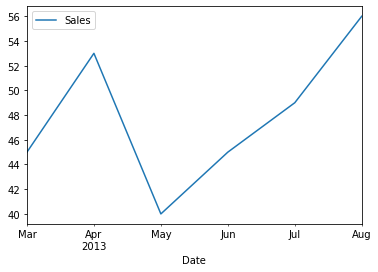

In [615]:
yeartodate.tail(6).plot();